In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

Select max(date)
From measurement

Select date 
From measurement 
order by date desc
limit 1

In [29]:
# Find the most recent date in the data set.
last_date_str = session.query(func.max(Measurement.date)).scalar()
last_date_str

'2017-08-23'

<Axes: xlabel='date'>

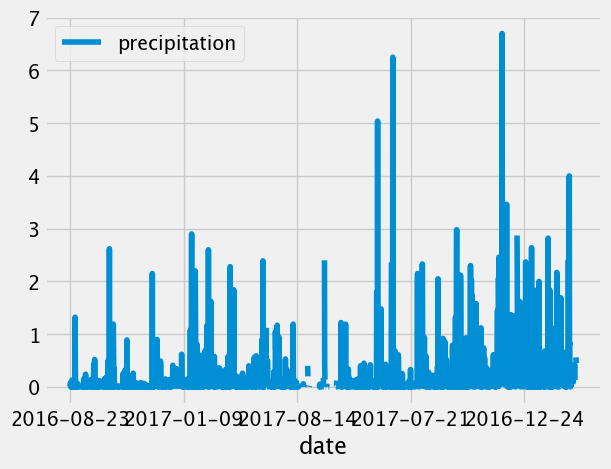

In [36]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_last_date = dt.date(2017,8,23) - dt.timedelta(days= 365)


# Perform a query to retrieve the data and precipitation scores
retrieve_data = []
retrieve_data = session.query(Measurement.date, Measurement.prcp)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
retrieve_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= year_last_date)
retrieve_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= year_last_date).all()


# Sort the dataframe by date
rain_by_date_df = pd.DataFrame(results, columns=['date','precipitation'])
rain_by_date_df.set_index(rain_by_date_df['date'], inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
rain_by_date_df.plot()

In [37]:
# Use Pandas to calculate the summary statistics for the precipitation data
rain_by_date_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [38]:
# Design a query to calculate the total number of stations in the dataset
session.query(Measurement.station).distinct().count()

9

In [41]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active = session.query(Measurement.station,func.count(Measurement.station)).\
                               group_by(Measurement.station).\
                               order_by(func.count(Measurement.station).desc()).all()
active


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [43]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_lha = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
                filter(Measurement.station == 'USC00519281').order_by(func.min(Measurement.tobs)).all()
active_lha

[(54.0, 85.0, 71.66378066378067)]

In [55]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active = session.query(Measurement.tobs).\
      filter(Measurement.date >= year_last_date, Measurement.station == 'USC00519281').\
      order_by(Measurement.tobs).all()


In [56]:
bins=12
dataframe = pd.DataFrame(active, columns=['Tobs'])
dataframe.plot.hist(bins)
plt.ylim(0,70)

KeyError: '[(59.0,), (60.0,), (61.0,), (62.0,), (63.0,), (64.0,), (65.0,), (66.0,), (67.0,), (68.0,), (69.0,), (70.0,), (71.0,), (72.0,), (73.0,), (74.0,), (75.0,), (76.0,), (77.0,), (78.0,), (79.0,), (80.0,), (81.0,), (82.0,), (83.0,)] not in index'

# Close Session

In [54]:
# Close Session
session.close()